In [1]:
!pip install nltk

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import string
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
!pip install wordcloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
test.head()

,Unnamed: 0,comment_text,original_len,label
0,0,yo bitch ja rule is more succesful then you'll...,367,1
1,1,== from rfc == \n\n the title is fine as it is...,50,1
2,2,""" \n\n == sources == \n\n * zawe ashton on lap...",54,0
3,3,":if you have a look back at the source, the in...",205,0
4,4,i don't anonymously edit articles at all.,41,0


In [6]:
print('The shape of train dataset \n',train.shape)
print('The shape of test dataset \n',test.shape)

The shape of train dataset 
 (159571, 8)
The shape of test dataset 
 (153164, 4)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    153164 non-null  int64 
 1   comment_text  153164 non-null  object
 2   original_len  153164 non-null  int64 
 3   label         153164 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.7+ MB


In [9]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
test.describe()

,Unnamed: 0,original_len,label
count,153164.000000,153164.000000,153164.000000
mean,76581.500000,364.877543,0.168910
std,44214.782652,592.506496,0.374674
min,0.000000,1.000000,0.000000
25%,38290.750000,79.000000,0.000000
50%,76581.500000,180.000000,0.000000
75%,114872.250000,392.000000,0.000000
max,153163.000000,5165.000000,1.000000


In [11]:
train.drop("id",axis=1,inplace=True)

<AxesSubplot:xlabel='malignant'>

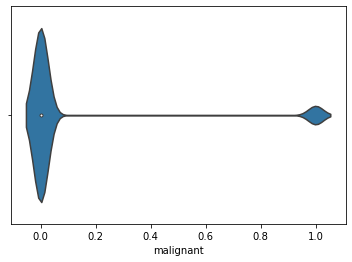

In [12]:
# we see very low prpobabliy of comment being malignant
sns.violinplot(train["malignant"])

<AxesSubplot:xlabel='highly_malignant'>

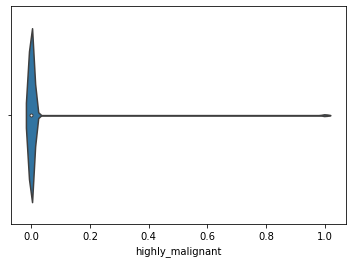

In [13]:
# we see very low prpobabliy of comment being malignant
sns.violinplot(train["highly_malignant"])

<AxesSubplot:xlabel='highly_malignant'>

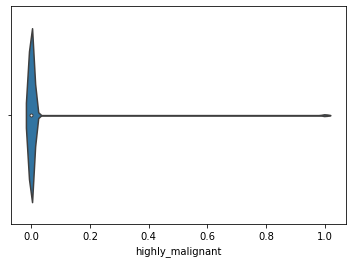

In [14]:
# we see very low prpobabliy of comment being malignant
sns.violinplot(train["highly_malignant"])

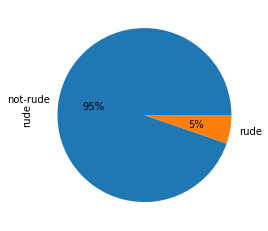

In [15]:
# we see very low prpobabliy of comment being malignant
train["rude"].value_counts().plot.pie(labels=["not-rude", "rude"], autopct="%1.0f%%")
plt.show()

<AxesSubplot:xlabel='threat', ylabel='count'>

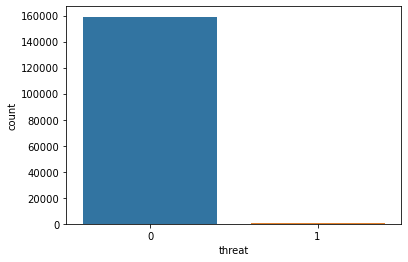

In [16]:
# we see very low prpobabliy of comment being malignant
sns.countplot(train["threat"])

<AxesSubplot:xlabel='abuse', ylabel='count'>

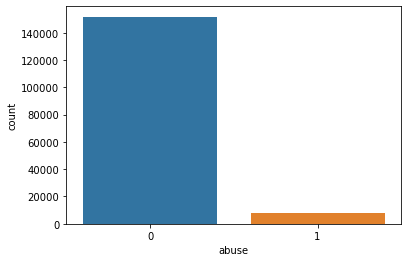

In [17]:
# we see very low prpobabliy of comment being malignant
sns.countplot(train["abuse"])

<AxesSubplot:xlabel='loathe', ylabel='count'>

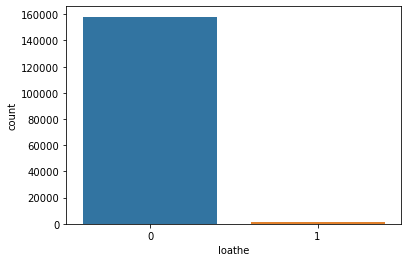

In [18]:
# we see very low prpobabliy of comment being malignant
sns.countplot(train["loathe"])

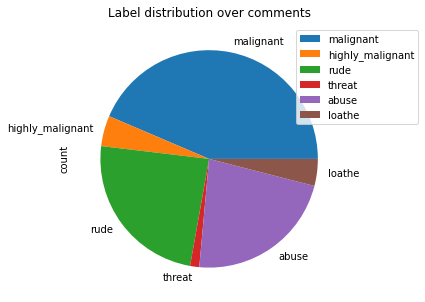

In [19]:
#checking how which comment fall under which category
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_plot = train[cols_target].sum().to_frame().rename(columns={0: 'count'})
df_plot.plot.pie(y='count',title='Label distribution over comments',figsize=(5, 5)).legend(loc='center left', bbox_to_anchor=(0.8, 0.8))

<AxesSubplot:>

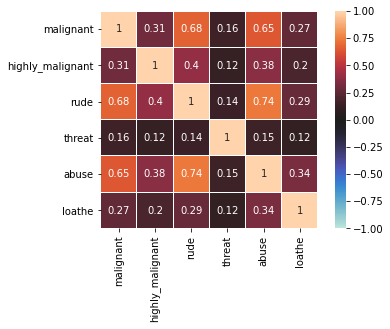

In [20]:
sns.heatmap(train.corr(),vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=.1)

In [21]:
#checking length of document
train["original_len"] = train["comment_text"].str.len() 

In [22]:
#converting all letter to lower case
train["comment_text"] = train["comment_text"].str.lower()

In [23]:
#replacing with email address
train["comment_text"]= train["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',"emailaddress")

#replacing with web address                                                 
train["comment_text"]= train["comment_text"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$',"webaddress")
                    
#replacing with number
train["comment_text"]= train["comment_text"].str.replace(r'\d+(\.\d+)?',"number")

#remove  punctation
train["comment_text"]=train["comment_text"].str.replace(r'[^\w\d\s]'," ")

# replace extra space
train["comment_text"]=train["comment_text"].str.replace(r'^\s+'," ")

#replacing leadning and trailing white space
train["comment_text"]=train["comment_text"].str.replace(r'^\s+|\s+?$', "")

#removing \n
train["comment_text"]=train["comment_text"].str.replace("\n"," ")


# remove stopwords
stop_words = set(stopwords.words('english') + ["m","ur","aww","d","dont","cant","doin","ja","u"])
train["comment_text"]= train["comment_text"].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words ))

#Lemmatizing is the process of grouping together the inflected forms of a word so they can be analysed as a single item.
#This is quite similar to stemming in its working but differs since it depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, 
#such as neighboring sentences or even an entire document.
lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(word) for word in x.split()))

In [24]:
train["clean_len"] = train["comment_text"].str.len() 

In [25]:
train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_len,clean_len
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,170
1,match background colour seemingly stuck thanks...,0,0,0,0,0,0,112,91
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,365
4,sir hero chance remember page,0,0,0,0,0,0,67,29


In [26]:
# making one target column 
train["label"]=train["malignant"] | train["highly_malignant"] | train["rude"] | train["threat"] | train["abuse"] | train["loathe"]

In [27]:
print('original length',train.original_len.sum())
print('cleaned length',train.clean_len.sum())

original length 62893130
cleaned length 40149092


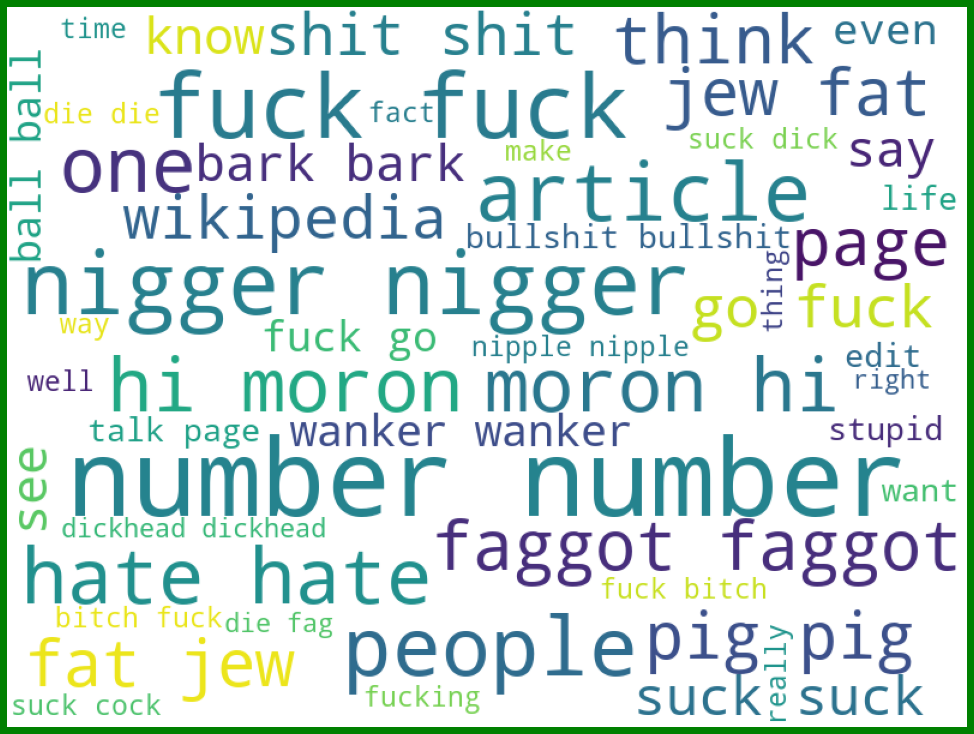

In [28]:
# seeing the word which are offensive
from wordcloud import WordCloud

malignant=train["comment_text"][train["label"]==1]

malign_cloud= WordCloud(width=800,height=600,background_color="white",max_words=50).generate(" ".join(malignant))

plt.figure(figsize=(15,10),facecolor="g")
plt.imshow(malign_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

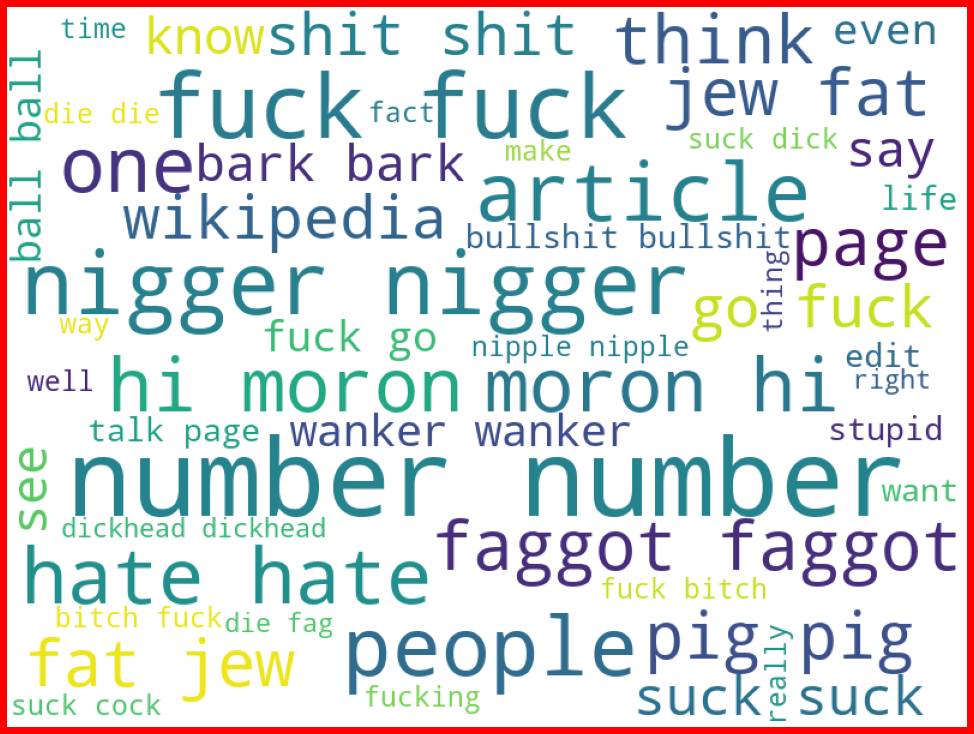

In [29]:
# seeing the word which are not offensive
from wordcloud import WordCloud

non_malignant=train["comment_text"][train["label"]==0]

#malign_cloud= WordCloud(width=800,height=600,background_color="white").generate(" ".join(non_malignant))

plt.figure(figsize=(15,10),facecolor="r")
plt.imshow(malign_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [30]:
test.head()

,Unnamed: 0,comment_text,original_len,label
0,0,yo bitch ja rule is more succesful then you'll...,367,1
1,1,== from rfc == \n\n the title is fine as it is...,50,1
2,2,""" \n\n == sources == \n\n * zawe ashton on lap...",54,0
3,3,":if you have a look back at the source, the in...",205,0
4,4,i don't anonymously edit articles at all.,41,0


In [31]:
print("The no. of Rows in dataset is: ",test.shape[0],"and no. of columns is ",test.shape[1])

The no. of Rows in dataset is:  153164 and no. of columns is  4


In [32]:
#train.drop("id",axis=1,inplace=True)
train["comment_text"] = train["comment_text"].str.lower()
train["original_len"] = train["comment_text"].str.len() 
train.head()


,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_len,clean_len,label
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,170,170,0
1,match background colour seemingly stuck thanks...,0,0,0,0,0,0,91,91,0
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,141,141,0
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,365,365,0
4,sir hero chance remember page,0,0,0,0,0,0,29,29,0


In [33]:
print('original length',test.original_len.sum())
#print('cleaned length',test.clean_len.sum())

original length 55886104


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

In [35]:
#using tfidf vectorizer to convert text into vector as our machine learning model only understands numerical value
tf= TfidfVectorizer()
features = tf.fit_transform(train["comment_text"])
x= features
y= train["label"]

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=70)

In [37]:
lr= LogisticRegression()
lr.fit(x_train,y_train)

y_pred= lr.predict(x_test)
print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     35857
           1       0.94      0.61      0.74      4036

    accuracy                           0.96     39893
   macro avg       0.95      0.80      0.86     39893
weighted avg       0.96      0.96      0.95     39893



In [38]:
a=accuracy_score(y_test,y_pred)
c=cross_val_score(lr,x,y,cv=3).mean()
loss = log_loss(y_test,y_pred)
print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)
confusion_matrix(y_test,y_pred)

accuracy_score :  0.9561326548517284 
 cross validation score : 0.9541583357023237 
 logloss: 1.5151277924313036


array([[35689,   168],
       [ 1582,  2454]], dtype=int64)

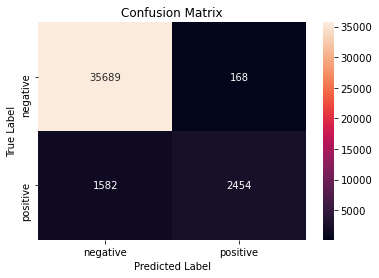

In [39]:
conf_mat = confusion_matrix(y_test, y_pred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [40]:
accuracy = []
cross_val = []
diff = []
logloss=[]
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

In [41]:
dt= AdaBoostClassifier()
dt.fit(x_train,y_train)

y_pred=dt.predict(x_test)


KeyboardInterrupt: 

In [42]:
print("\nClassification report :\n",classification_report(y_test,y_pred))                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       


Classification report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     35857
           1       0.94      0.61      0.74      4036

    accuracy                           0.96     39893
   macro avg       0.95      0.80      0.86     39893
weighted avg       0.96      0.96      0.95     39893



In [ ]:
a=accuracy_score(y_test,y_pred)
c=cross_val_score(dt,x,y,cv=3).mean()
loss = log_loss(y_test,y_pred)

In [ ]:
print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

In [ ]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)
print("\nClassification report :\n",classification_report(y_test,y_pred))

In [ ]:
a=accuracy_score(y_test,y_pred)
c=cross_val_score(knn,x,y,cv=3).mean()
loss = log_loss(y_test,y_pred)
print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

In [ ]:
ad= MultinomialNB()
ad.fit(x_train,y_train)

y_pred=ad.predict(x_test)
print("\nClassification report :\n",classification_report(y_test,y_pred))

In [ ]:
a=accuracy_score(y_test,y_pred)
c=cross_val_score(ad,x,y,cv=3).mean()
loss = log_loss(y_test,y_pred)
print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)
model = ["LogisticRegression","AdaBoostClassifier","KNeighborsClassifier","MultinomialNB"]
classifier = pd.DataFrame({"MODEL":model,"Accuracy score":accuracy,"Cross_validation_Score":cross_val,"Difference":diff,"Logloss":logloss})

classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param =      {'warm_start':[True,False],
            'dual':[True,False],
              'random_state':[50,70,100]}
rand_search = RandomizedSearchCV(lr,param_distributions=param,cv=2)
rand_search.fit(x_train,y_train)

In [ ]:
rand_search.best_params_

In [ ]:
lr= LogisticRegression(warm_start=False,random_state=50,dual=False)
lr.fit(x_train,y_train)
print('...........................................')

y_pred1= lr.predict(x_test)
print(" Accuracy score :",accuracy_score(y_test,y_pred1),"\n","="*80,"\n Cross_validation_Score :",
      cross_val_score(lr,x,y,cv=3).mean(),"\n","="*80,"\n Classification report :\n",classification_report(y_test,y_pred1),
     "="*80,"\n Confusion matrix :\n",confusion_matrix(y_test,y_pred1))

In [ ]:
log_loss(y_test,y_pred1)

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
plt.style.use('seaborn')

disp = plot_roc_curve(lr,x_test,y_test,color='orange')
plot_roc_curve(knn,x_test,y_test,color='green',ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,color='red',ax=disp.ax_)
plot_roc_curve(ad,x_test,y_test,ax=disp.ax_)

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)

In [ ]:
import pickle
pickle.dump(lr,open("comment.pk1","wb"))
load_model = pickle.load(open("comment.pk1","rb"))

In [ ]:
testing_data = tf.transform(test["comment_text"])
a=lr.predict(testing_data)
pd.DataFrame(a)

In [ ]:
test["label"]=a
test

In [ ]:
test.to_csv("test.csv")